In [4]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [7]:
F = 5
L = 9

model_samp_st = CmdStanModel(stan_file='code_7.stan')
model_log_target = CmdStanModel(stan_file='code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='code_9.stan')
data = {'N': F}
seed = 2161999 
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target.sample(data=data,seed=seed)
result_3 = model_log_target_ind.sample(data=data,seed=seed)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiling stan file C:\Users\piotr\Desktop\ISZ\Semestr 1\data_analytics_2022\Lab02\code_9.stan to exe file C:\Users\piotr\Desktop\ISZ\Semestr 1\data_analytics_2022\Lab02\code_9.exe
INFO:cmdstanpy:compiled model executable: C:\Users\piotr\Desktop\ISZ\Semestr 1\data_analytics_2022\Lab02\code_9.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/piotr/Desktop/ISZ/SEMEST~1/DATA_A~1/Lab02/code_9.hpp C:/Users/piotr/Desktop/ISZ/SEMEST~1/DATA_A~1/Lab02/code_9.stan
Warning in 'C:/Users/piotr/Desktop/ISZ/SEMEST~1/DATA_A~1/Lab02/code_9.stan', line 6, column 3: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |█████████▌| 00:00 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


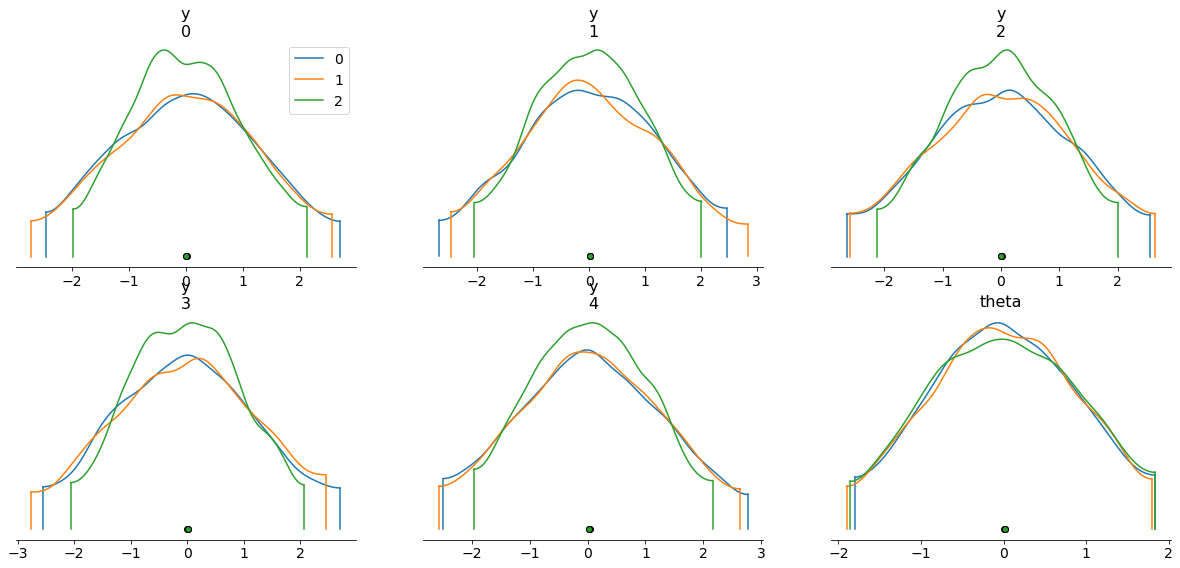

In [8]:
az.plot_density([result_1,result_2,result_3])
plt.show()

In [9]:
model_gq = CmdStanModel(stan_file='code_10.stan')
# fill in with chosen result from previous excercise
mean_of_y = model_gq.generate_quantities(data=data,
                                        mcmc_sample = result_3)
# investigate the output and plot histogram of mean_y variableŌ

INFO:cmdstanpy:compiling stan file C:\Users\piotr\Desktop\ISZ\Semestr 1\data_analytics_2022\Lab02\code_10.stan to exe file C:\Users\piotr\Desktop\ISZ\Semestr 1\data_analytics_2022\Lab02\code_10.exe
INFO:cmdstanpy:compiled model executable: C:\Users\piotr\Desktop\ISZ\Semestr 1\data_analytics_2022\Lab02\code_10.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/piotr/Desktop/ISZ/SEMEST~1/DATA_A~1/Lab02/code_10.hpp C:/Users/piotr/Desktop/ISZ/SEMEST~1/DATA_A~1/Lab02/code_10.stan
Warning in 'C:/Users/piotr/Desktop/ISZ/SEMEST~1/DATA_A~1/Lab02/code_10.stan', line 6, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -m64 -D_REENTRANT -Wall -Wno-unused-function -Wno-uninitialized -Wno-unused-but-set-variable -Wno-unu

array([[<AxesSubplot:title={'center':'mean_y'}>]], dtype=object)

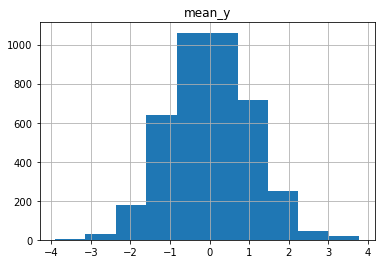

In [10]:
df = mean_of_y.draws_pd()
df.hist()